In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast 

In [351]:
df = pd.read_parquet('datasets/clean_movies_dataset.parquet')


# Introducción

El Análisis Exploratorio de Datos (EDA) es una etapa crucial en el proceso de desarrollo de un sistema de recomendación de películas. Nos permite comprender mejor las características y relaciones presentes en el conjunto de datos, y así identificar patrones y tendencias significativas. En este EDA, nos centraremos en un DataFrame que contiene información relevante sobre películas



In [329]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'release_year', 'return'],
      dtype='object')

El dataframe contiene las columnas: 'belongs_to_collection', 'budget', 'genres', 'id', 'original_language', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count', 'release_year' y 'return'.

El objetivo principal de este análisis es encontrar relaciones significativas entre estas columnas y establecer una base sólida para construir un sistema de recomendación de películas efectivo. Para lograr esto, llevaremos a cabo una serie de análisis y visualizaciones que nos ayudarán a comprender mejor el conjunto de datos y sus implicaciones para el sistema de recomendación.

Comenzaremos explorando  las variables numericas y categoricas, observando su comportamientos y caracteristicas. Estas variables nos darán una idea de las preferencias y opiniones generales de los usuarios, de forma que podamos agrupar conjuntos de peliculas con caracteristicas similares. Y finalizaremos con la declaración de aquellas columnas más adecuadas para realizar el sistema de recomendación.

En resumen, este EDA nos guiará a través de un análisis detallado de las características clave del conjunto de datos de películas, en busca de relaciones significativas que nos permitan construir un sólido sistema de recomendación. Los resultados y conclusiones de este análisis proporcionarán información valiosa para el desarrollo de algoritmos de recomendación y la mejora de la experiencia del usuario.

# Descripción general del Dataframe

In [330]:
df.shape

(45379, 20)

Hay 45379 filas y 20 columnas que ya conocemos su nombre

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45379 entries, 0 to 45462
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4489 non-null   object        
 1   budget                 45379 non-null  int64         
 2   genres                 45379 non-null  object        
 3   id                     45379 non-null  int64         
 4   original_language      45368 non-null  object        
 5   overview               44438 non-null  object        
 6   popularity             45379 non-null  float64       
 7   production_companies   45379 non-null  object        
 8   production_countries   45379 non-null  object        
 9   release_date           45379 non-null  datetime64[ns]
 10  revenue                45379 non-null  int64         
 11  runtime                45133 non-null  float64       
 12  spoken_languages       45379 non-null  object        
 13  status

Tenemos que las columnas tienen distintos tipo valores, de esto podemos definir las columnas en 2 tipos de variables: numericas y categoricas.

Las variables numericas son:
- *budget*: 
    Representa el presupuesto de una película, es decir, la cantidad de dinero asignada para su producción.
- *id*:
    Es un identificador único asignado a cada película en el conjunto de datos. Nos permite realizar un seguimiento individual de cada película.
- *popularity*:
    Representa la popularidad de una película basada en una métrica específica. 
- *revenue*:
    Representa los ingresos generados por una película, es decir, la cantidad de dinero que ha ganado.
- *runtime*:
    Muestra la duración de una película en minutos.
- *vote_average*:
    Representa el promedio de votos dados por los usuarios a una película.
- *vote_count*:
    Indica el número total de votos recibidos por una película.
- *release_date*:
    Indica la fecha de lanzamiento de una película.
- *release_year*:
    Muestra el año de lanzamiento de una película.
- *return*:
    Representa el rendimiento financiero de una película en términos de ingresos (revenue) en relación con su presupuesto.

Las variables categoricas son:

- *belongs_to_collection*:
    Indica a qué colección de películas pertenece una película en particular
- *genres*:
    Muestra los géneros a los que pertenece una película.
- *original_language*:
    Indica el idioma original en el que se realizó la película.
- *overview*:
     Proporciona una breve descripción o sinopsis de la trama de la película.
- *production_companies*:
    Enumera las compañías productoras involucradas en la creación de una película.
- *production_countries*:
    Muestra los países en los que se realizó la producción de una película.
- *spoken_languages*:
    Enumera los idiomas hablados en una película.
- *status*:
     Indica el estado de la película, como "Lanzada" o "En producción".
- *tagline*:
    Proporciona una frase o lema promocional para una película.
- *title*:
    Es el título de la película.

Revisemos la cantidad de los nulos por columna

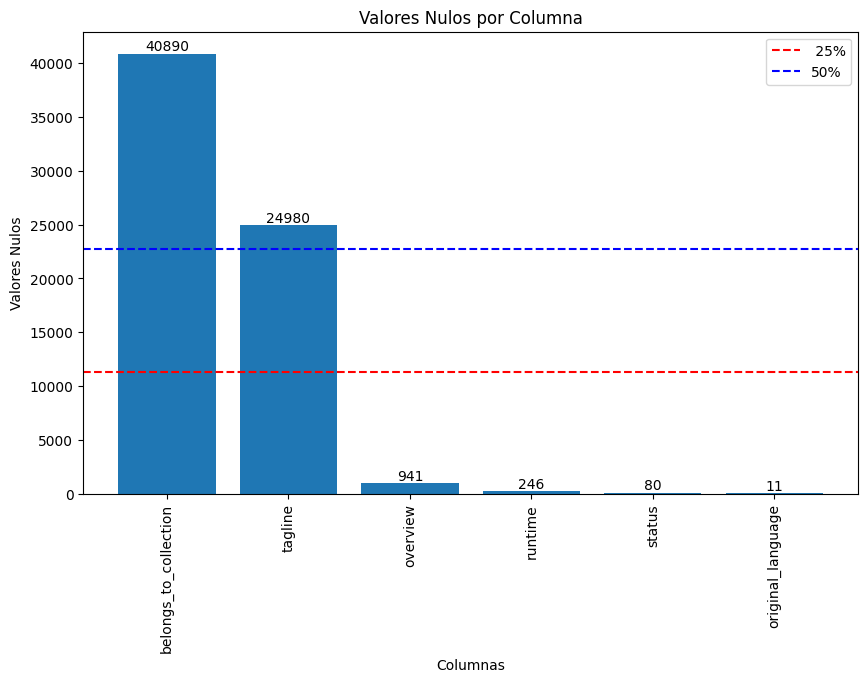

In [423]:
canitdad_nulos = df.isnull().sum()

# Filtrar las columnas con valores nulos mayores a cero
filtro_cantidad_nulos = canitdad_nulos[canitdad_nulos > 0].sort_values(ascending=False)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(filtro_cantidad_nulos.index, filtro_cantidad_nulos.values)

# Agregar etiquetas a las barras
for i, value in enumerate(filtro_cantidad_nulos.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar los ejes y el título del gráfico
plt.xlabel('Columnas')
plt.ylabel('Valores Nulos')
plt.title('Valores Nulos por Columna')

plt.axhline(45379/4, color='red', linestyle='--', label=' 25%')
plt.axhline(45379/2, color='blue', linestyle='--', label='50%')
plt.legend()

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()



Podemos ver que que hacen falta de datos en las columnas belongs_to_collection, original_language,overview,runtime, status, tagline. La falta de estos datos puede ser problematico si se desea analizar a profundidad los datos de estas columnas

Observemos una descripción de las variables numericas:

In [333]:
df.describe()

,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count,release_year,return
count,4.537900e+04,45379.000000,45379.000000,45379,4.537900e+04,45133.000000,45379.000000,45379.000000,45379.000000,4.537900e+04
mean,4.232325e+06,108029.978955,2.926356,1992-05-16 02:18:40.324379136,1.122936e+07,94.181043,5.624079,110.089931,1991.882236,6.599991e+02
min,0.000000e+00,2.000000,0.000000,1874-12-09 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26386.500000,0.388835,1978-10-06 00:00:00,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59859.000000,1.130503,2001-08-30 00:00:00,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156538.000000,3.690686,2010-12-17 00:00:00,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2020-12-16 00:00:00,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07
std,1.743932e+07,112166.713796,6.009491,NaN,6.438789e+07,38.340053,1.915381,491.727295,24.054986,7.469083e+04


De esto podemos concluir:

- Las variables numericas tienden a tener valores numericos muy grandes.

- Que los percentiles del 25%,50%,75% sean tan cercanos al cero, implica que la distribución de los datos está sesgada hacia la izquierda o tiene una cola larga hacia la izquierda. Esto significa que hay un grupo de valores atípicos o extremadamente altos que están inflando el valor máximo y extendiendo la cola hacia ese extremo, mientras que la mayoría de los valores se encuentran en un rango mucho más bajo.

- Este tipo de distribución sesgada hacia la izquierda puede afectar el análisis y los modelos predictivos, ya que los valores atípicos pueden tener un impacto desproporcionado en los resultados. En tales casos, es importante considerar si es necesario aplicar transformaciones a los datos, para reducir la influencia de los valores extremadamente altos y obtener una distribución más simétrica o cercana a una distribución normal. Esto puede ayudar a obtener una representación más precisa de los datos y a mejorar el rendimiento de los modelos o análisis posteriores. Por lo que variables como budget, revenue, return, no se deberían tomar en cuenta para una segmentación de datos sin antes estandarizar los datos.

- La variable id, no debería tomarse en cuenta pues a pesar de ser un numero, es una variable descriptiva.

- La variable popularity, aunque sesgada a la, por su desviacion estandar tan baja, podría usarse para segmentar conjuntos y tendriamos una gran cantidad de segmentos, se podría estandarizar para mejorar su eficacia.

- Las variables, release_Date, y release_year, al ser fechas de emision de las peliculas, se podrían tomar para segmentar las peliculas, pero, si hay relación entre ellas el uso de una, descarta el uso de la otra.

- Las varia vote_count, vote_average, al igual que popularity, podrían usarse para segmentar conjuntos y tendriamos una gran cantidad de segmentos, se podría estandarizar para mejorar su eficacia.

Observemos una descripción de las variables categoricas:

In [334]:
df.describe(include=['O'])

,belongs_to_collection,genres,original_language,overview,production_companies,production_countries,spoken_languages,status,tagline,title
count,4489,45379,45368,44438,45379,45379,45379,45299,20399,45379
unique,1695,4066,89,44235,22706,2390,1931,6,20270,42198
top,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...","[{'id': 18, 'name': 'Drama'}]",en,No overview found.,[],"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella
freq,29,4998,32204,133,11796,17846,22382,44939,7,11


De esto podemos concluir:

- Las variables title y overview, no deben de ser un parametro para segmentar un grupo de datos por su alta taza de valores unicos, se debe encontrar una forma de estandarizar los datos en caso tan particular que se desee usar alguno de estos parametros.

- La variable tagline, por su alta taza de valores unicos, y la gran cantidad de valores nulos, por si sola no se debería utilizar como un parametro para segmentar un grupo de datos, se debe encontrar una forma de estandarizar los datos en caso tan particular que se desee usar como parametro.

- La variable production_companies, tiene aproximandamente una taza del 50% en unicidad, por lo cual podría ser considerada para segmentar conjuntos de datos, pero por la gran cantidad de datos "[]" en ella, recomendaria no usarla

- Las variables status, original_languaje, spoken_langauges y production_countries tienen un pequeña taza de unicidad y sus valores de mayor frecuencia tienden a ser cercanos al 50% o superior de la cantidad total de datos , por lo que no recomendaría el uso de estas variables

- La variable genres, no tiene tantos valores unicos, su valor más frecuente tampoco ocupa gran parte de los datos, por lo que lo veo como una variable optima para segmentar datos

- La variable belongs_to_collection, a pesar de su baja cantidad de datos, su taza de unicos está por debajo del 50%, y su dato de mayor frecuencia no ocupa gran parte de todos los datos. Lo considero como una variable aceptable para segmentar los datos, pero primero se debería realizar algo con sus datos faltantes

Observemos una matriz de correlación entre las variables numericas

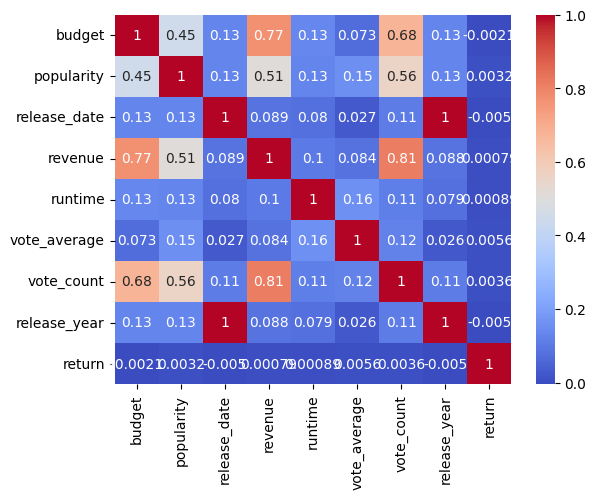

In [346]:
numericas = ['budget','popularity','release_date','revenue','runtime','vote_average','vote_count','release_year','return']
corr_matrix = df[numericas].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Podemos concluir que:

- Release_date y Release_year están correlacionadas, si se desea usar una, para evitar redundancias, se podría omitir el uso de la otra variable, recomiendo el uso de la variable release_year por ser más pequeña

- La variable budget,popularity tienen un correlación alta con revenue y vote_count, por lo que el uso de estas podría descartar el uso de las otras

- Las variables vote_average, return y runtime , no están correlacionadas con ninguna otra variable, por lo que sirven como parametros para segmentar un grupo de datos 

# Conclusión

Al realizar el EDA he identificado varias columnas que podrían ser fundamentales para desarrollar un modelo de recomendaciones de películas. Estas columnas son "genres" , "popularity" , "release_date" , "vote_average" y "production_companies".

Durante el EDA, he observado que la columna "genres" proporciona información sobre los géneros de las películas, lo que puede ser crucial para entender los gustos y preferencias de los usuarios. La columna "popularity" da una medida de qué tan populares son las películas, lo cual puede ser útil para priorizar recomendaciones basadas en la preferencia del público en general. La columna "release_date" permite considerar las tendencias y estacionalidad en el lanzamiento de películas, lo que puede influir en las preferencias de los usuarios en diferentes momentos del año.La columna "vote_average" proporciona una medida del promedio de votos recibidos por las películas, lo que puede servir como indicador de la calidad percibida de las mismas. Por último, la columna "production_companies" ofrece información sobre las empresas productoras de las películas, lo cual puede ser útil para tener en cuenta la reputación y el estilo de producción de cada compañía al realizar recomendaciones.

Al considerar estas columnas como posibles características para el modelo de recomendaciones, se puede tener en cuenta los géneros preferidos de los usuarios, la popularidad de las películas, las preferencias estacionales, la calidad percibida y las características de las empresas productoras. Esto permitirá ofrecer recomendaciones más personalizadas y relevantes a los usuarios, teniendo en cuenta sus preferencias individuales y las características clave de las películas.

No se dejan de lado las demás columnas, pero para ser consumidas, deberían pasar por un proceso de limpieza y estandarización para ser de utilidad en el sistema de recomendaciones.